In [1]:
import os
import sys
import fitsio
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import matplotlib as mpl

from   astropy.table import Table

In [2]:
cwd = os.getcwd()
code_root = '/'.join(x for x in cwd.split('/')[:-2])

sys.path.append(code_root)

print(cwd)
print(code_root)

/cosma/home/durham/dc-wils7/DESI/docs/nb
/cosma/home/durham/dc-wils7/DESI


In [3]:
import pubplot

from   cosmo         import cosmo, fsky
from   cartesian     import rotate
from   findfile      import findfile
# from   poisson     import fillfactor_expectation, fillfactor_poisson

In [4]:
survey  = 'gama'
field   = 'G12'
dryrun  = False
realz   = 0
version = 'GAMA4'

In [5]:
nbar   = 2.
radius = 8.

In [9]:
fpath = findfile(ftype='randoms', field=field, dryrun=dryrun, survey=survey, version=version)
rand  = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.039),
             ('ZMAX', 0.263),
             ('DZ', 0.0001),
             ('NRAND', 1265954),
             ('FIELD', 'G12'),
             ('AREA', 60.0),
             ('VOL', 2531908.950723488),
             ('RAND_DENS', 0.4999998122516435),
             ('VOL8', 2144.660584850632),
             ('OVERSAMPLE', 1),
             ('SEED', 364),
             ('PREFIX', 'randoms'),
             ('REALZ', 0),
             ('NRAND8', 1072.329889768816),
             ('NRAND8_PERR', 32.74644850619401),
             ('EXTNAME', 'RANDOMS')])

In [10]:
bound = Table.read(fpath, 'BOUNDARY')
bound

<Table length=540000>
     BOUND_RA            BOUND_DEC                Z                  V          ...   ROTCARTESIAN_X      ROTCARTESIAN_Y      ROTCARTESIAN_Z   
     float64              float64              float64            float64       ...      float64             float64             float64       
------------------ --------------------- ------------------- ------------------ ... ------------------ ------------------- --------------------
             186.0   -0.5993622151357236 0.07144800497783309 47927.407498281864 ... 210.11151055845707   22.08242345447361 -0.37648132168546944
             186.0 -0.028078089756552682 0.04367667418526872  3816.802902615331 ... 129.13788636784162  13.573397257746345   1.0633314121406754
             174.0    1.7601640018222424 0.12577607528972545 293793.99550875596 ...  365.5776919214502 -38.435591268902556   14.490458757995812
             174.0      0.31087012077912 0.08313844598273315  80366.67149343388 ... 243.90028271664275 -25.637149436521455    3.459284066214429
             186.0    1.6954966166290735 0.18725231391459907    953718.15460282 ...  537.3759583821333  56.497314667187325    20.68927311395656
             174.0    0.9719885776508628 0.17165427393637708  739844.1111491593 ... 494.43279910637534 -51.976698133988506   12.751515591208001
             174.0    0.7307081189790998 0.08372085245391617   82237.1298696577 ... 245.54825899456034 -25.812033473274536    5.292421038704527
             174.0   -1.0917565750730562  0.2463790153223925  2102735.415932571 ...  698.6275118277011  -73.41922892219375    -7.28906895836031
             186.0   -1.5835953732819252  0.1403536594851054 408189.51037352736 ...  406.9753855627386  42.766090762218894   -7.759710941364914
             174.0   -2.8839431549239434 0.17276930854787279  754006.7210324671 ... 497.26331888499055  -52.24337662270663  -20.839783886623124
             186.0   -1.3938154868387427 0.16746542739363773  688145.2103103782 ... 482.89205637217736   50.74509849093007  -7.5984351657790805
             174.0   0.15703507816753515 0.21643734930388117 1450485.2900983344 ...  617.6976158847599  -64.92666919328333    7.093038397171868
             174.0    -1.840820453560595 0.05425456949521661  15888.43650788511 ... 160.04562510919632 -16.817370708105212   -3.774348196417857
             186.0    1.0576561961799573 0.10781356459516217 183619.50010281499 ... 314.64277685217337   33.07690616802621    8.588068127120247
               ...                   ...                 ...                ... ...                ...                 ...                  ...
175.89655440616008  -0.06646740519339112               0.039                0.0 ... 115.75364033568259   -8.30455290381841   0.8755297352296817
178.99472216357958   -2.5899954443938267               0.263 2531908.9507234883 ...   746.578406162373 -13.095695569653483  -27.250446132437233
 182.0595562172913    -1.068867431860354               0.039                0.0 ... 115.97378462650748   4.170073817224342  -1.1528946072878026
185.38932654807275    -1.838098201091123               0.263 2531908.9507234883 ...  743.6854350130894   70.14213716740238   -17.47726946065596
    180.3299369993   -0.2682474249713884               0.039                0.0 ... 116.05158531542797  0.6682870700273056  0.46940428218636576
178.50645007166747   -2.0548228313647927               0.039                0.0 ... 115.97232902639907  -3.022946120217058  -3.1493013763469992
176.29349214991277   -2.4155490616562405               0.263 2531908.9507234883 ...  745.2113305130374  -48.25968811040568  -24.989517468207737
176.07975644173825    0.5754841720463562               0.039                0.0 ... 115.76249217012337  -7.933986060727318    2.175930596887693
175.10107890087667   -2.9492216580184225               0.263 2531908.9507234883 ...    743.78193075183  -63.72416818756106  -31.954193476012374
176.23082478694207   -0.4856387293192146               0.039                0.0 ... 115.80

In [11]:
fpath = findfile(ftype='randoms_n8', field=field, dryrun=dryrun, survey=survey, version=version)
rand  = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.039),
             ('ZMAX', 0.263),
             ('DZ', 0.0001),
             ('NRAND', 1265954),
             ('FIELD', 'G12'),
             ('AREA', 60.0),
             ('VOL', 2531908.950723488),
             ('RAND_DENS', 0.4999998122516435),
             ('VOL8', 2144.660584850632),
             ('OVERSAMPLE', 1),
             ('SEED', 364),
             ('PREFIX', 'randoms'),
             ('REALZ', 0),
             ('NRAND8', 1072.329889768816),
             ('NRAND8_PERR', 32.74644850619401),
             ('EXTNAME', 'RANDOMS'),
             ('RSPHERE', 8.0),
             ('IMMUTABLE', 'FALSE')])

In [12]:
fpath = findfile(ftype='randoms_bd', field=field, dryrun=dryrun, survey=survey, version=version)
rand  = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.039),
             ('ZMAX', 0.263),
             ('DZ', 0.0001),
             ('NRAND', 1265954),
             ('FIELD', 'G12'),
             ('AREA', 60.0),
             ('VOL', 2531908.950723488),
             ('RAND_DENS', 0.4999998122516435),
             ('VOL8', 2144.660584850632),
             ('OVERSAMPLE', 1),
             ('SEED', 364),
             ('PREFIX', 'randoms'),
             ('REALZ', 0),
             ('NRAND8', 1072.329889768816),
             ('NRAND8_PERR', 32.74644850619401),
             ('EXTNAME', 'RANDOMS'),
             ('RSPHERE', 8.0),
             ('IMMUTABLE', 'FALSE')])

In [13]:
rand

<Table length=1265954>
    RANDOM_RA           RANDOM_DEC               Z                  V          ...     BOUND_DIST     BOUNDID FILLFACTOR_POISSON
     float64             float64              float64            float64       ...      float64        int64       float64      
------------------ -------------------- ------------------- ------------------ ... ------------------ ------- ------------------
177.72809320816467  -2.0702691893740615 0.17751396119884158  825706.2276518778 ...  8.350534450959373  382500 1.0065695118541713
185.54664637327164  0.25695371228937774 0.22243354892541328 1578636.6929936863 ...  5.071235222684215  389578 0.9148300554755687
176.45117350162005   0.6212761539245919 0.18363377874851908  910555.8371590216 ... 12.774173195419564  535904    1.0161281337386
177.90684687764795  -1.7315944613831566  0.2070583468405367  1286029.848851052 ... 13.186915244391246  537267 1.0017902009119568
177.28088511570968  -2.7060099832935727  0.1509916295398498  516655.2201594547 ... 2.2680115877793257  493600 0.7073380194477257
175.75760294502552   1.9226485835692364    0.25543330686274 2339908.9859921024 ... 1.0706058644597949  439453 0.6026594529572745
 175.5280043525956    1.889628567217554  0.2227479384839168 1585018.4626383276 ...  1.352634320969441  385115 0.6185127770582782
185.29516679335447 -0.28156420098474266 0.22311279706373863 1592444.9211959012 ...  7.876489583959873  499827 0.9958452043740805
 175.5994395205367   -2.835367677834231 0.12580758913173934 303539.14248430094 ... 1.0660123505360528  503937 0.5848244633436454
177.71388327602105  -1.5768327114930043 0.21810420824260576 1492399.1999856418 ... 15.545367353876872  521249 1.0021399065906555
  175.431021193899  -0.8339807200936341 0.19232054269926727 1040239.2292383082 ... 13.855566451848501  517353 0.9919984419083958
185.22715809765947   1.3731524553625063 0.18334841220609333   906481.108443232 ...  5.800944002778081  432054 0.9360455333166179
 181.9779006939505    0.460942098261755  0.2090273416454104 1321399.9808260323 ... 16.151628352286934  492753 1.0135636254281435
184.68228075234038 -0.02861383892288304 0.20501076277850022  1249890.244294851 ...  13.56411168755105  425677 0.9889676593596745
               ...                  ...                 ...                ... ...                ...     ...                ...
174.89977559587672    1.228703191945952   0.253874090251682  2299665.884045815 ...  9.741578153466333  460518  0.999575398280199
 180.7055703423635   1.7193152144725208 0.12286532964503961  283246.6331348245 ... 1.8072401191672345  360018  0.647538348390263
181.75117181496464  -1.0585195928723836 0.18376774949108451  912472.8240492265 ... 18.000537922299717  470782 0.9893173650383731
184.41509712983395    1.737753746636142  0.2587479413231683 2426911.2628375283 ... 3.4020591815725734  465909 0.7838069945231555
 182.2747333250698 -0.07361470783549605  0.2086733837773579 1314996.7947965364 ... 21.708550981640123  387496 1.0062198061754726
 182.2206817967386   0.9395135822456225 0.16011312181304607  612567.0578504868 ...   8.62651692690873  374172 0.9973605956484412
180.69625179933178   1.5072056556986615 0.15834482302365324   593149.564352388 ...  3.968515999928383  457603 0.8378948061618742
182.99961706838454   1.0666554528788779 0.17732657003259092  823191.3824446601 ...   8.36871228746684  451910 0.9929309903849254
180.63233426772734  -0.3136302940986483 0.17272370498951833  762947.2019990672 ... 20.213188102506052  388996 0.9928144218253592
185.27576762655968  -1.0313155725496586 0.09422664306762094  129999.2548398133 ...  3.513594957602875  400784 0.7909176766566939
185.68013751003758   1.6425356111531981  0.2533431594234754 2286062.0311965956 ...  4.028931441098098  388928 0.7132830159856021
 176.1425177783169  -0.5829408875167094  0.2623495446318064 2523700.1017688815 ... 1.7732057980876446  475559 0.6586123615490524
185.74309164504925   1.0243962147691974  0.1436123612334034 446587.14558029507 ...  1.881408252818789  4451

In [14]:
fpath = findfile(ftype='randoms_bd_ddp_n8', field=field, dryrun=dryrun, survey=survey, version=version)

rand  = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.039),
             ('ZMAX', 0.263),
             ('DZ', 0.0001),
             ('NRAND', 1265954),
             ('FIELD', 'G12'),
             ('AREA', 180.0),
             ('VOL', 2531908.950723488),
             ('RAND_DENS', 0.4999998122516435),
             ('VOL8', 2144.660584850632),
             ('OVERSAMPLE', 1),
             ('SEED', 364),
             ('PREFIX', 'randoms'),
             ('REALZ', 0),
             ('NRAND8', 1072.329889768816),
             ('NRAND8_PERR', 32.74644850619401),
             ('EXTNAME', 'RANDOMS'),
             ('RSPHERE', 8.0),
             ('IMMUTABLE', 'False'),
             ('GOLD_NGAL', 113687),
             ('THETA_DEF', 'Z_THETA_QCOLOR'),
             ('DDP1_ZMIN', 0.0390699990093708),
             ('DDP1_ZMAX', 0.2629899978637695),
             ('DDP1_VZ', 7594754.153764196),
             ('DDP1ZLIMS_NGAL', 113687),
             ('DDP1_NGAL', 45293),
             ('DDP1_DENS', 0.005963721679858641),
             ('D

Text(0, 0.5, 'DEC [deg.]')

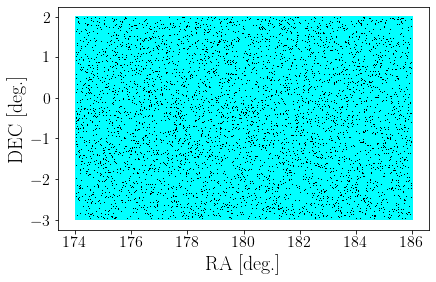

In [15]:
pl.plot(rand['RANDOM_RA'], rand['RANDOM_DEC'], marker=',', lw=0.0, c='k')
pl.plot(bound['BOUND_RA'], bound['BOUND_DEC'], marker=',', lw=0.0, c='cyan')
pl.xlabel('RA [deg.]')
pl.ylabel('DEC [deg.]')

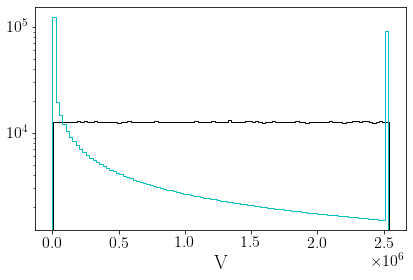

In [16]:
_ = pl.hist(rand['V'], bins=100, histtype='step', color='k')
_ = pl.hist(bound['V'], bins=100, histtype='step', color='c')

pl.xlabel('V')
pl.yscale('log')

(0.0, 0.6)

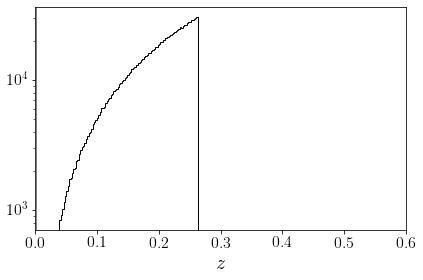

In [17]:
_ = pl.hist(rand['Z'], bins=100, histtype='step', color='k')

pl.axvline(300. / 2.9979e5, lw=0.5, c='k')

pl.yscale('log')
pl.xlabel('$z$')

pl.xlim(0.0, 0.6)

In [20]:
pos       = np.c_[rand['ROTCARTESIAN_X'], rand['ROTCARTESIAN_Y'], rand['ROTCARTESIAN_Z']]
pos_bound = np.c_[bound['ROTCARTESIAN_X'], bound['ROTCARTESIAN_Y'], bound['ROTCARTESIAN_Z']]

Text(0, 0.5, '$y$')

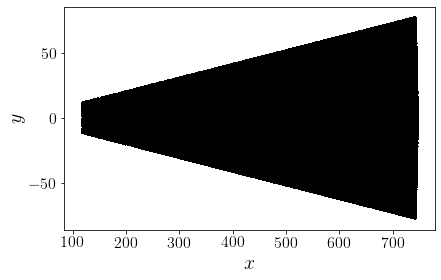

In [21]:
pl.plot(pos[::1,0], pos[::1,1], marker=',', lw=0.0, c='k')

pl.xlabel('$x$')
pl.ylabel('$y$')

Text(0, 0.5, '$y$')

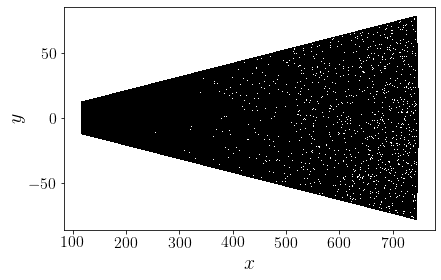

In [22]:
pl.plot(pos_bound[:,0], pos_bound[:,1], marker=',', lw=0.0, c='k')
pl.xlabel('$x$')
pl.ylabel('$y$')

(0.0, 1000.0)

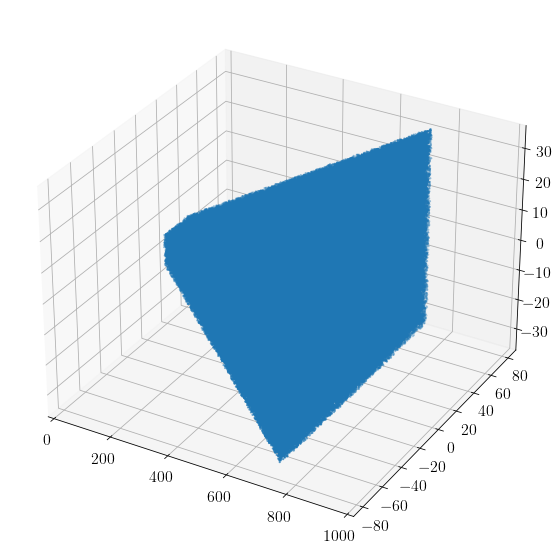

In [23]:
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(projection='3d')

ax.scatter(pos[::1, 0],\
           pos[::1, 1],\
           pos[::1, 2],\
           marker='.',\
           lw=0.0)

ax.set_xlim(0.0, 1000.)

(0.0, 1000.0)

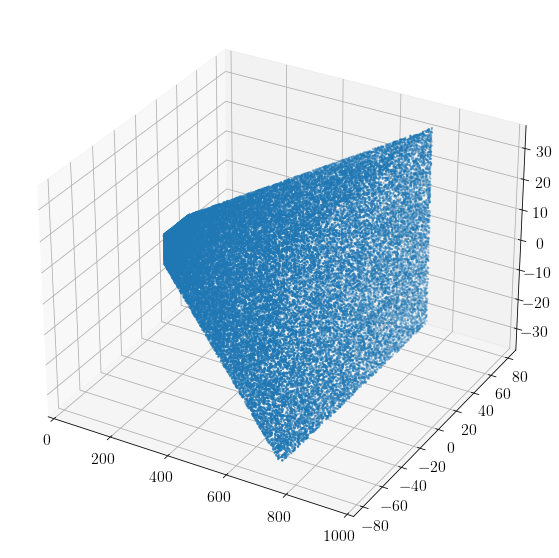

In [24]:
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(projection='3d')

ax.scatter(pos_bound[:,0][::10],\
           pos_bound[:,1][::10],\
           pos_bound[:,2][::10],\
           marker='.',\
           lw=0.0)

ax.set_xlim(0.0, 1000.)

In [25]:
np.mean(rand['V'] < np.percentile(rand['V'], 1.))

0.01000036336233386

In [26]:
rand['RAND_N8'].data.min(), rand['RAND_N8'].data.max()

(1384, 8935)

(50.0, 9500.0)

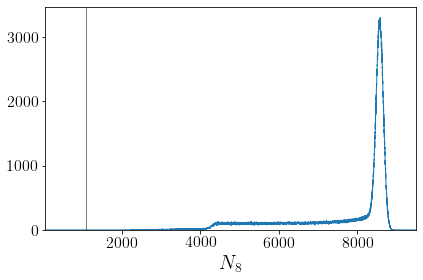

In [27]:
_ = pl.hist(rand['RAND_N8'], bins=np.arange(0, 9500, 1), histtype='step')

pl.axvline(rand.meta['NRAND8'], c='k', lw=0.5)

pl.xlabel(r'$N_8$')
pl.xlim(50., 9500.)

In [28]:
# 100. * np.sqrt(rand.meta['NRAND8']) / rand.meta['NRAND8']

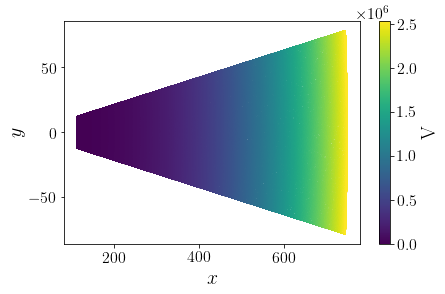

In [29]:
# isin = rand['IS_BOUNDARY'].astype(bool)

pl.scatter(pos_bound[:,0], pos_bound[:,1], lw=0.0, c=bound['V'], s=2)
pl.xlabel('$x$')
pl.ylabel('$y$')
pl.colorbar(label='V')

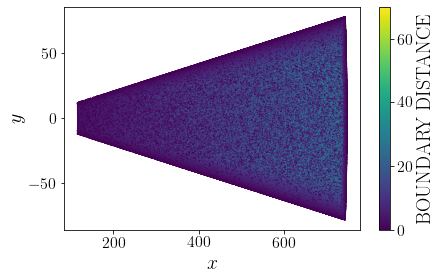

In [30]:
pl.scatter(pos[:,0], pos[:,1], lw=0.0, c=rand['BOUND_DIST'], s=2, vmin=0., vmax=70.)
pl.xlabel('$x$')
pl.ylabel('$y$')
pl.colorbar(label='BOUNDARY DISTANCE')

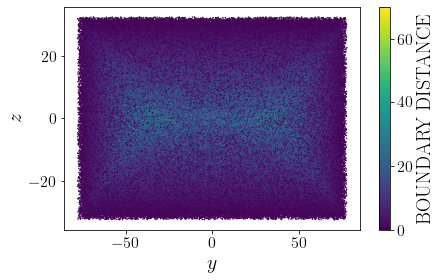

In [31]:
pl.scatter(pos[:,1], pos[:,2], lw=0.0, c=rand['BOUND_DIST'], s=2, vmin=0., vmax=70.)
pl.xlabel('$y$')
pl.ylabel('$z$')
pl.colorbar(label='BOUNDARY DISTANCE')

In [32]:
# pl.scatter(pos_bound[:,0], pos_bound[:,1], lw=0.0, c=bound['RAND_N8'], vmin=0, vmax=1500, s=2)
# pl.xlabel('$x$')
# pl.ylabel('$y$')
# pl.colorbar(label=r'$N_8$')

(0.2, 1.1)

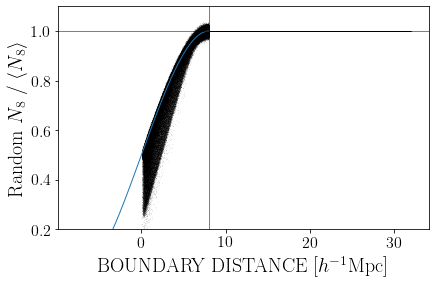

In [33]:
def theory_ff(bound_dist, radius):
    d = bound_dist
    r = radius
    sphere_cap_vol = 1. - (3. * 8. - d) * d**2 / 4. / 8**3. # [V sphere]
    
    return sphere_cap_vol

d = np.arange(0., 16., 0.1)
r = np.ones_like(d) * 8 # Mpc/h

sphere_cap_vol = 1. - (3. * 8. - d) * d**2 / 4. / 8**3. # [V sphere]

#isin = ~rand['IS_BOUNDARY'].astype(bool)

pl.scatter(rand['BOUND_DIST'], rand['FILLFACTOR'], marker='.', lw=0.0, s=2, alpha=0.1, c='k')

# pl.plot(8. - d, sphere_cap_vol)
pl.plot(8. - d, theory_ff(d, 8), lw=1.)

pl.xlabel('BOUNDARY DISTANCE [$h^{-1}$Mpc]')
pl.ylabel(r'Random $N_8 \ / \ \langle N_8 \rangle$')

pl.axhline(1.00, c='k', lw=0.5)
pl.axvline(8.00, c='k', lw=0.5)

pl.ylim(0.2, 1.1)

Text(0.5, 0, 'BOUND_DIST [$h^{-1}$Mpc]')

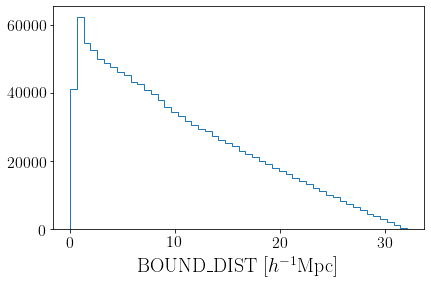

In [34]:
_ = pl.hist(rand['BOUND_DIST'], bins=50, histtype='step')
pl.xlabel('BOUND_DIST [$h^{-1}$Mpc]')

In [35]:
fpath = findfile(ftype='ddp_n8', dryrun=dryrun, survey=survey, version=version)
gold  = Table.read(fpath)
gold.meta

OrderedDict([('AREA', 180.0),
             ('GOLD_NGAL', 113687),
             ('IMMUTABLE', 'False'),
             ('THETA_DEF', 'Z_THETA_QCOLOR'),
             ('DDP1_ZMIN', 0.0390699990093708),
             ('DDP1_ZMAX', 0.2629899978637695),
             ('DDP1_VZ', 7594754.153764196),
             ('DDP1ZLIMS_NGAL', 113687),
             ('DDP1_NGAL', 45293),
             ('DDP1_DENS', 0.005963721679858641),
             ('DDP2_ZMIN', 0.03914999961853027),
             ('DDP2_ZMAX', 0.1937000006437302),
             ('DDP2_VZ', 3156659.558717707),
             ('DDP2ZLIMS_NGAL', 73942),
             ('DDP2_NGAL', 33396),
             ('DDP2_DENS', 0.01057953807776663),
             ('DDP3_ZMIN', 0.03903000056743622),
             ('DDP3_ZMAX', 0.1015800014138222),
             ('DDP3_VZ', 457819.2340050841),
             ('DDP3ZLIMS_NGAL', 18121),
             ('DDP3_NGAL', 8842),
             ('DDP3_DENS', 0.01931329953669401),
             ('TMR_DDP1', '[-21.8, -20.1]'),
        

In [36]:
fpath = findfile(ftype='randoms_bd_ddp_n8', field=field, dryrun=dryrun, survey=survey, version=version, prefix='randoms_ddp1')

rand  = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.0390699990093708),
             ('ZMAX', 0.2629899978637695),
             ('DZ', 0.0001),
             ('NRAND', 1265792),
             ('FIELD', 'G12'),
             ('AREA', 180.0),
             ('VOL', 2531584.717921398),
             ('RAND_DENS', 0.4999998582071158),
             ('VOL8', 2144.660584850632),
             ('OVERSAMPLE', 1),
             ('SEED', 364),
             ('PREFIX', 'randoms_ddp1'),
             ('REALZ', 0),
             ('NRAND8', 1072.329988327706),
             ('NRAND8_PERR', 32.74645001107304),
             ('EXTNAME', 'RANDOMS'),
             ('RSPHERE', 8.0),
             ('IMMUTABLE', 'False'),
             ('GOLD_NGAL', 113687),
             ('THETA_DEF', 'Z_THETA_QCOLOR'),
             ('DDP1_ZMIN', 0.0390699990093708),
             ('DDP1_ZMAX', 0.2629899978637695),
             ('DDP1_VZ', 7594754.153764196),
             ('DDP1ZLIMS_NGAL', 113687),
             ('DDP1_NGAL', 45293),
             ('DDP1_DENS', 0.005963

In [37]:
pos       = np.c_[rand['ROTCARTESIAN_X'], rand['ROTCARTESIAN_Y'], rand['ROTCARTESIAN_Z']]
pos

array([[568.35659142,  49.25767157,  15.13888805],
       [568.22953997, -34.81775225,  16.01144475],
       [556.65668373, -45.97104107,  22.00304815],
       ...,
       [416.27890923,   3.13493194,  -4.32161384],
       [571.10589205,  15.1240853 ,   2.38326109],
       [730.64562865, -25.51704238, -20.68172421]])

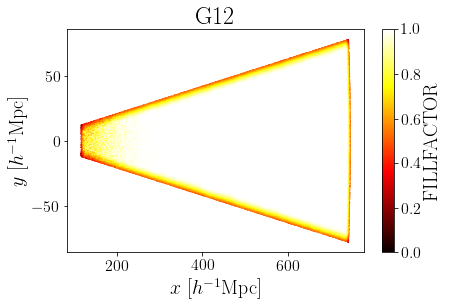

In [38]:
fills     = rand['FILLFACTOR'].data
pos_slice = pos

fills     = fills[np.abs(pos_slice[:,2]) < 5.]
pos_slice = pos_slice[np.abs(pos_slice[:,2]) < 5.]
    
plt.scatter(pos_slice[:,0],\
            pos_slice[:,1],\
            c=fills,\
            marker='.',\
            lw=0.0,\
            s=4,\
            vmin=0.,\
            vmax=1.,\
            cmap='hot')

pl.xlabel('$x$ [$h^{-1}$Mpc]')
pl.ylabel('$y$ [$h^{-1}$Mpc]')

pl.colorbar(label='FILLFACTOR')
    
plt.title('{}'.format(field))
plt.show()

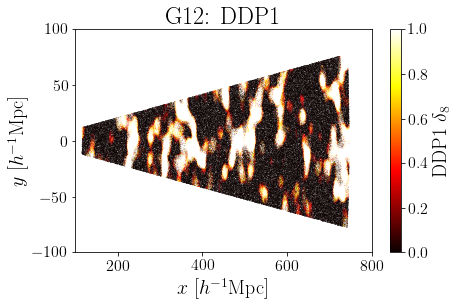

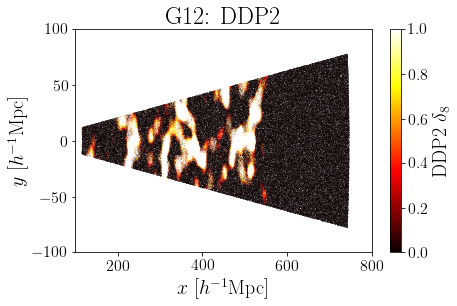

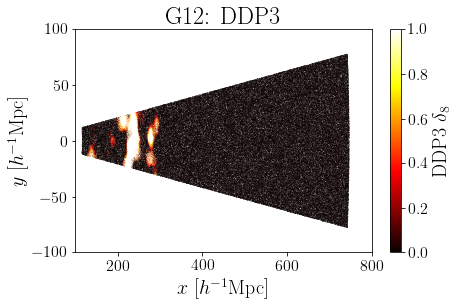

In [39]:
for idx in np.arange(1, 4, 1):
    fills     = rand['DDP{}_DELTA8'.format(idx)].data
    pos_slice = pos

    fills     = fills[np.abs(pos_slice[:,2]) < 5.]
    pos_slice = pos_slice[np.abs(pos_slice[:,2]) < 5.]
    
    plt.scatter(pos_slice[:,0],\
                pos_slice[:,1],\
                c=fills,\
                marker='.',\
                lw=0.0,\
                s=1,\
                vmin=0.,\
                vmax=1.,\
                cmap='hot')
    
    pl.xlabel('$x$ [$h^{-1}$Mpc]')
    pl.ylabel('$y$ [$h^{-1}$Mpc]')

    pl.xlim(100.,  800.)
    pl.ylim(-100., 100.)
    
    pl.colorbar(label='DDP{}  $\delta_8$'.format(idx))
    
    plt.title('{}:  DDP{}'.format(field, idx))
    plt.show()

In [40]:
cmap     = plt.cm.tab20c

cmaplist = [cmap(i) for i in range(cmap.N)]

cmap     = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)

bounds   = np.linspace(0, 9, 10)
norm     = mpl.colors.BoundaryNorm(bounds, cmap.N)

-29.01932036722664 29.161523957034582


Text(0.5, 1.0, 'G12:  DDP1')

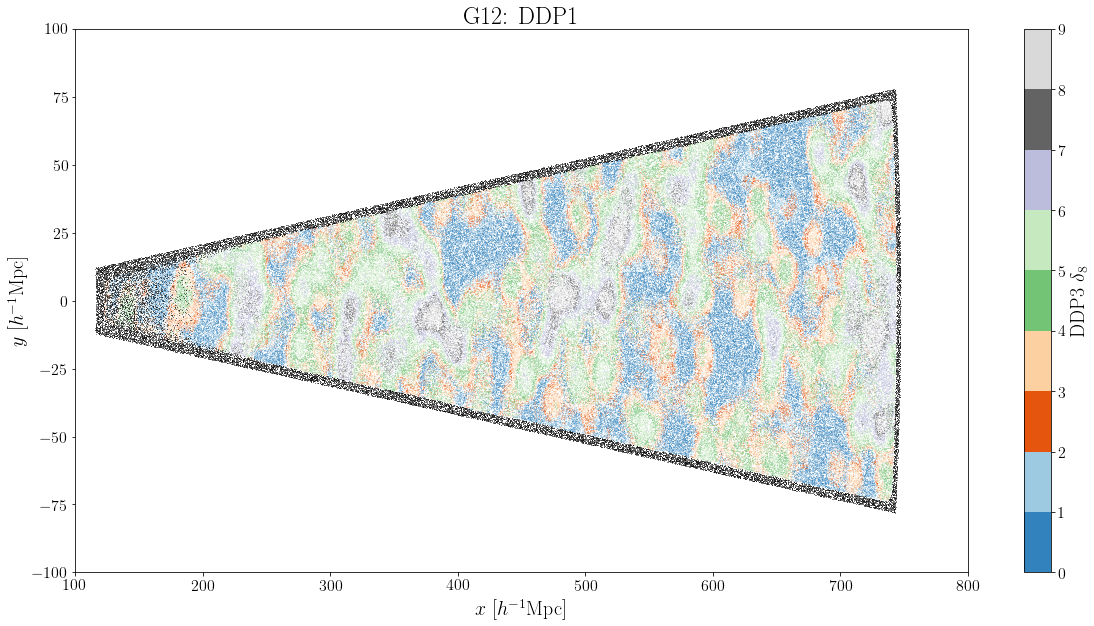

In [41]:
slice_limit = 5.

fig, ax   = plt.subplots(1,1,figsize=(20,10))

isin      = rand['FILLFACTOR'].data > 0.8

fills     = rand['DDP1_DELTA8_TIER'].data[isin]
pos_slice = pos[isin]

lims      = np.sort(pos_slice[:,2])

print(lims[0], lims[-1])

fills     = fills[np.abs(pos_slice[:,2]) < slice_limit]
pos_slice = pos_slice[np.abs(pos_slice[:,2]) < slice_limit]
    
mm = ax.scatter(pos_slice[:,0],\
           pos_slice[:,1],\
           c=fills,\
           marker='.',\
           lw=0.0,\
           s=2,\
           cmap=cmap,\
           norm=norm)

isin      = rand['FILLFACTOR'].data < 0.8
pos_slice = pos[isin]

ax.scatter(pos_slice[:,0][np.abs(pos_slice[:,2]) < slice_limit],\
           pos_slice[:,1][np.abs(pos_slice[:,2]) < slice_limit],\
           c='k',\
           marker='.',\
           lw=0.0,\
           s=2,\
           alpha=0.75)

ax.set_xlabel('$x$ [$h^{-1}$Mpc]')
ax.set_ylabel('$y$ [$h^{-1}$Mpc]')

ax.set_xlim(100.,  800.)
ax.set_ylim(-100., 100.)
    
fig.colorbar(label='DDP{}  $\delta_8$'.format(idx), ax=ax, mappable=mm)
    
ax.set_title('{}:  DDP1'.format(field))

-32.50840184026242 32.570340783816015


Text(0.5, 1.0, 'G12:  DDP1')

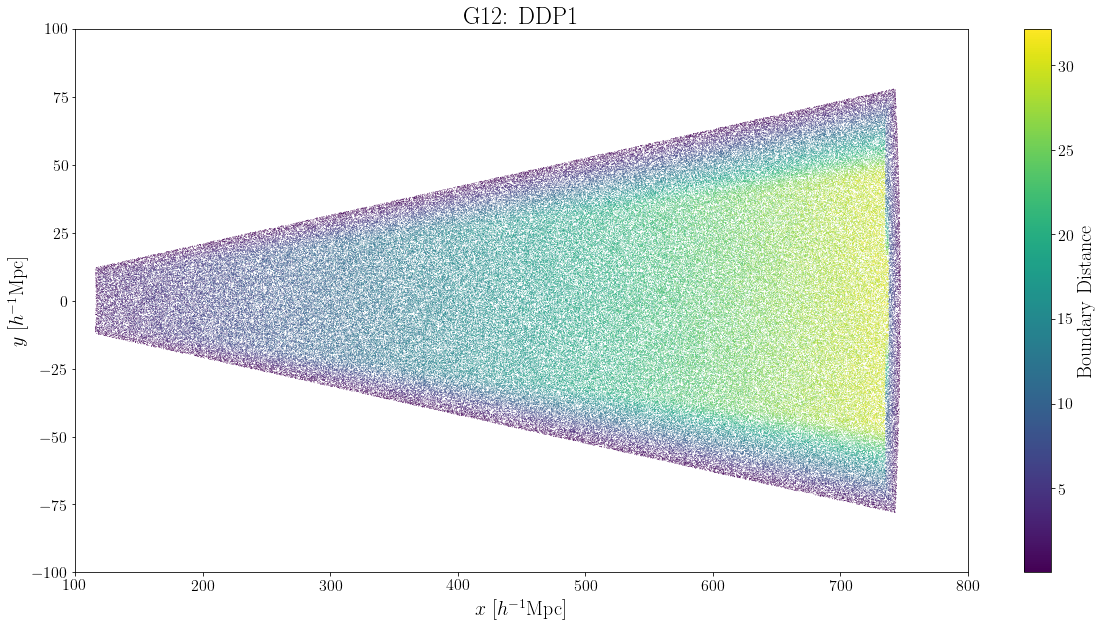

In [42]:
fig, ax   = plt.subplots(1,1,figsize=(20,10))

isin      = rand['FILLFACTOR'].data > 0.0

fills     = rand['BOUND_DIST'].data[isin]
pos_slice = pos[isin]

lims      = np.sort(pos_slice[:,2])

print(lims[0], lims[-1])

fills     = fills[np.abs(pos_slice[:,2]) < 5.]
pos_slice = pos_slice[np.abs(pos_slice[:,2]) < 5.]
    
mm = ax.scatter(pos_slice[:,0],\
           pos_slice[:,1],\
           c=fills,\
           marker='.',\
           lw=0.0,\
           s=2)

ax.set_xlabel('$x$ [$h^{-1}$Mpc]')
ax.set_ylabel('$y$ [$h^{-1}$Mpc]')

ax.set_xlim(100.,  800.)
ax.set_ylim(-100., 100.)
    
fig.colorbar(label='Boundary Distance'.format(idx), ax=ax, mappable=mm)
    
ax.set_title('{}:  DDP1'.format(field))

-32.50840184026242 32.570340783816015


Text(0.5, 1.0, 'G12:  DDP1')

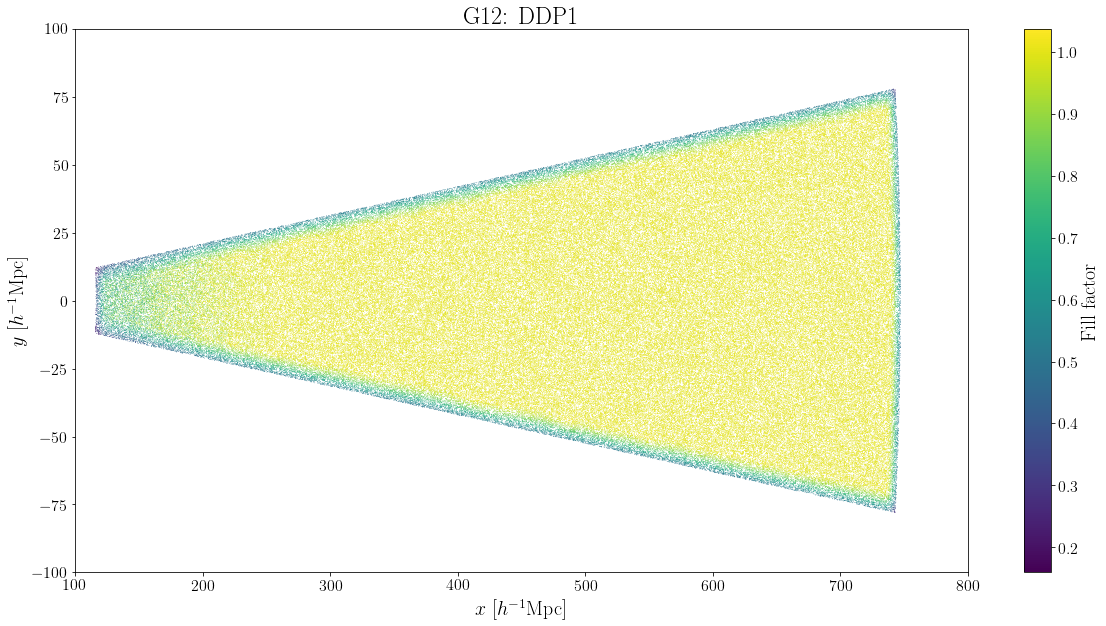

In [43]:
fig, ax   = plt.subplots(1,1,figsize=(20,10))

isin      = rand['FILLFACTOR'].data > 0.0

fills     = rand['FILLFACTOR'].data[isin]
pos_slice = pos[isin]

lims      = np.sort(pos_slice[:,2])

print(lims[0], lims[-1])

fills     = fills[np.abs(pos_slice[:,2]) < 5.]
pos_slice = pos_slice[np.abs(pos_slice[:,2]) < 5.]
    
mm = ax.scatter(pos_slice[:,0],\
           pos_slice[:,1],\
           c=fills,\
           marker='.',\
           lw=0.0,\
           s=2)

ax.set_xlabel('$x$ [$h^{-1}$Mpc]')
ax.set_ylabel('$y$ [$h^{-1}$Mpc]')

ax.set_xlim(100.,  800.)
ax.set_ylim(-100., 100.)
    
fig.colorbar(label='Fill factor'.format(idx), ax=ax, mappable=mm)
    
ax.set_title('{}:  DDP1'.format(field))

Text(0, 0.5, 'DDP1 $\\delta_8$')

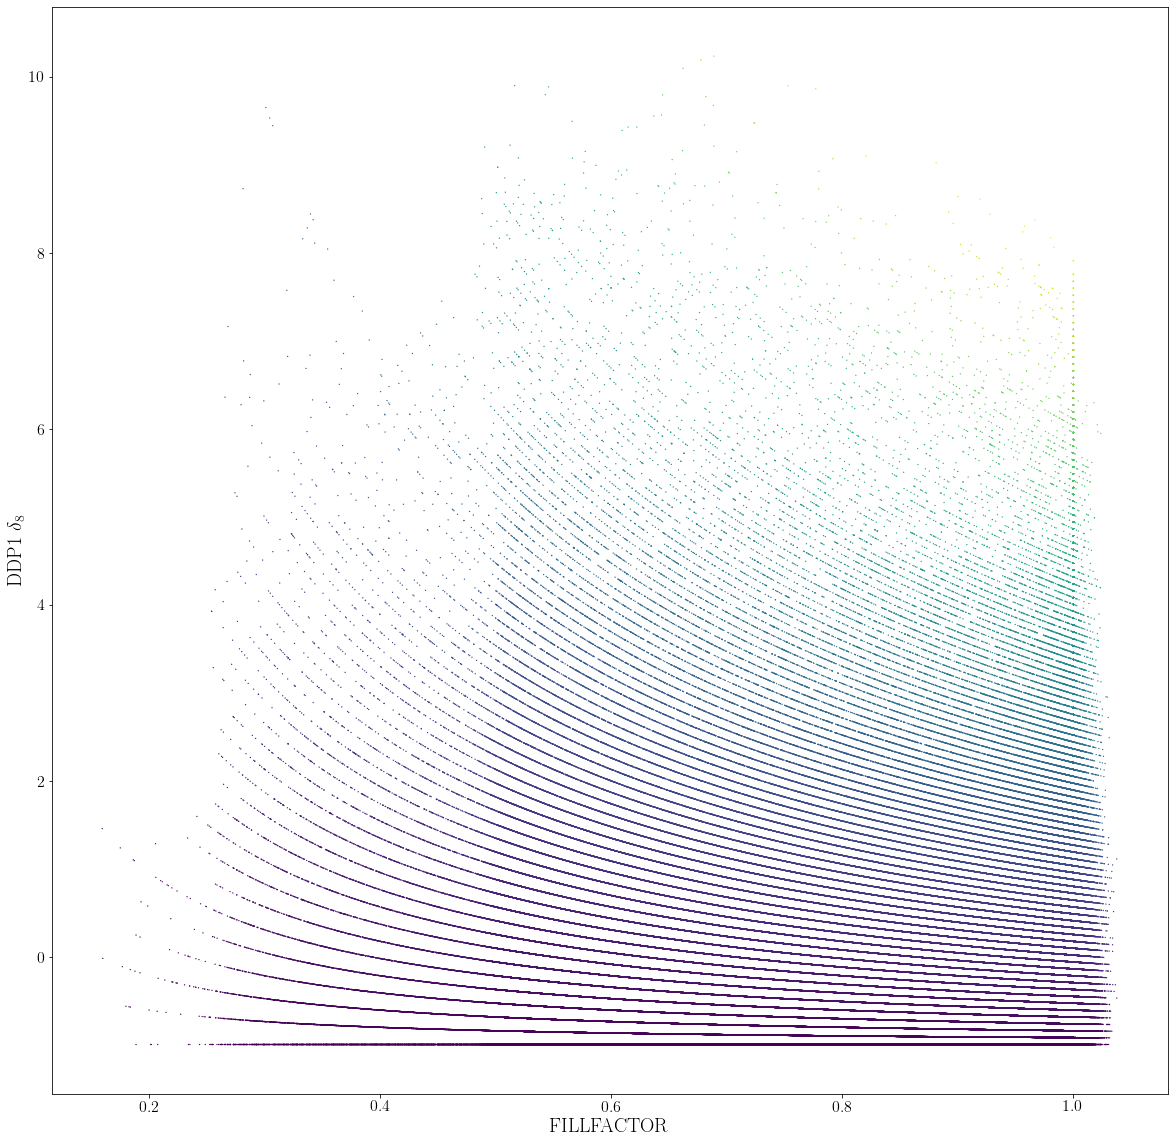

In [44]:
fig, ax = plt.subplots(1,1,figsize=(20,20))

ax.scatter(rand['FILLFACTOR'], rand['DDP1_DELTA8'], marker='.', lw=0.0, c=rand['DDP1_N8'], s=7)

ax.set_xlabel('FILLFACTOR')
ax.set_ylabel('DDP1 $\delta_8$')

Text(0, 0.5, 'DDP2 $\\delta_8$')

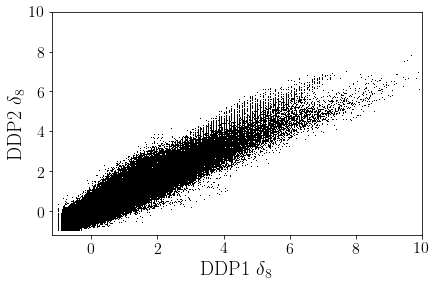

In [45]:
# Larger minimum redshift & Smaller maximum redshift. 
isin = (rand['Z'] > gold.meta['DDP1_ZMIN']) & (rand['Z'] < gold.meta['DDP2_ZMAX'])

pl.plot(rand['DDP1_DELTA8'][isin], rand['DDP2_DELTA8'][isin], marker=',', lw=0.0, c='k')

pl.xlim(-1.2, 10.)
pl.ylim(-1.2, 10.)

pl.xlabel('DDP1 $\delta_8$')
pl.ylabel('DDP2 $\delta_8$')

In [46]:
rand_ddp1fill = np.clip(np.sort(rand[rand['IN_DDP1']]['FILLFACTOR'].data)[::-1], 0, 1) 
rand_ddp2fill = np.clip(np.sort(rand[rand['IN_DDP2']]['FILLFACTOR'].data)[::-1], 0, 1)
rand_ddp3fill = np.clip(np.sort(rand[rand['IN_DDP3']]['FILLFACTOR'].data)[::-1], 0, 1)

KeyError: 'IN_DDP1'

In [ ]:
plt.plot(rand_ddp1fill, np.cumsum(rand_ddp1fill) / len(rand_ddp1fill), lw=1, color='blue',  label=r'${:.3f} \leq z \leq {:.3f}$'.format(rand.meta['DDP1_ZMIN'], rand.meta['DDP1_ZMAX']))
plt.plot(rand_ddp2fill, np.cumsum(rand_ddp2fill) / len(rand_ddp2fill), lw=1, color='green', label=r'${:.3f} \leq z \leq {:.3f}$'.format(rand.meta['DDP2_ZMIN'], rand.meta['DDP2_ZMAX']))
plt.plot(rand_ddp3fill, np.cumsum(rand_ddp3fill) / len(rand_ddp3fill), lw=1, color='red',   label=r'${:.3f} \leq z \leq {:.3f}$'.format(rand.meta['DDP3_ZMIN'], rand.meta['DDP3_ZMAX']))

plt.xlabel('Fill factor')
plt.ylabel(r'Volume fraction ($\geq$ Fill factor)')

pl.xlim(0.0, 1.05)
pl.ylim(0.0, 1.05)

plt.legend(frameon=False, loc=1)

# Done.